# Assignment: Compresive Strength Concrete Problem


### Abstract: 

Concrete is the most important material in civil engineering. The concrete compressive strength (concrete strength to bear the load) is a highly nonlinear function of age and ingredients.  <br><br>

<table border="1"  cellpadding="6" bordercolor="red">
	<tbody>
        <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Data Set Characteristics:&nbsp;&nbsp;</b></p></td>
		<td><p class="normal">Multivariate</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Instances:</b></p></td>
		<td><p class="normal">1030</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Area:</b></p></td>
		<td><p class="normal">Physical</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">
    <tbody>
        <tr>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Attribute Characteristics:</b></p></td>
            <td><p class="normal">Real</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Number of Attributes:</b></p></td>
            <td><p class="normal">9</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Date Donated</b></p></td>
            <td><p class="normal">2007-08-03</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">	
    <tbody>
    <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Associated Tasks:</b></p></td>
		<td><p class="normal">Regression</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Missing Values?</b></p></td>
		<td><p class="normal">N/A</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Web Hits:</b></p></td>
		<td><p class="normal">231464</p></td>
	</tr>
    </tbody>
    </table>

###  Description:
| Features Name | Data Type | Measurement | Description |
| -- | -- | -- | -- |
Cement (component 1) | quantitative | kg in a m3 mixture | Input Variable
Blast Furnace Slag (component 2) | quantitative | kg in a m3 mixture | Input Variable
Fly Ash (component 3) | quantitative | kg in a m3 mixture | Input Variable
Water (component 4) | quantitative | kg in a m3 mixture | Input Variable
Superplasticizer (component 5) | quantitative | kg in a m3 mixture | Input Variable
Coarse Aggregate (component 6) | quantitative | kg in a m3 mixture | Input Variable
Fine Aggregate (component 7) | quantitative | kg in a m3 mixture | Input Variable
Age | quantitative | Day (1~365) | Input Variable
Concrete compressive strength | quantitative | MPa | Output Variable

### WORKFLOW :
- Load Data
- Check Missing Values ( If Exist ; Fill each record with mean of its feature )
- Standardized the Input Variables. **Hint**: Centeralized the data
- Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).
- Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).
- Compilation Step (Note : Its a Regression problem , select loss , metrics according to it)
- Train the Model with Epochs (100) and validate it
- If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout layer or add Regularizer according to the need .
- Evaluation Step
- Prediction


# Load Data:
[Click Here to Download DataSet](https://github.com/ramsha275/ML_Datasets/blob/main/compresive_strength_concrete.csv)

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('compresive_strength_concrete.csv', header=None, skiprows=1)

In [3]:
data.head()

,0,1,2,3,4,5,6,7,8
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [4]:
data.isnull().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
dtype: int64

In [5]:
data.duplicated().sum()

25

In [6]:
data.drop_duplicates(inplace=True)

In [7]:
data.corr()

,0,1,2,3,4,5,6,7,8
0,1.000000,-0.303324,-0.385610,-0.056625,0.060906,-0.086205,-0.245375,0.086348,0.488283
1,-0.303324,1.000000,-0.312352,0.130262,0.019800,-0.277559,-0.289685,-0.042759,0.103374
2,-0.385610,-0.312352,1.000000,-0.283314,0.414213,-0.026468,0.090262,-0.158940,-0.080648
3,-0.056625,0.130262,-0.283314,1.000000,-0.646946,-0.212480,-0.444915,0.279284,-0.269624
4,0.060906,0.019800,0.414213,-0.646946,1.000000,-0.241721,0.207993,-0.194076,0.344209
5,-0.086205,-0.277559,-0.026468,-0.212480,-0.241721,1.000000,-0.162187,-0.005264,-0.144717
6,-0.245375,-0.289685,0.090262,-0.444915,0.207993,-0.162187,1.000000,-0.156572,-0.186448
7,0.086348,-0.042759,-0.158940,0.279284,-0.194076,-0.005264,-0.156572,1.000000,0.337367
8,0.488283,0.103374,-0.080648,-0.269624,0.344209,-0.144717,-0.186448,0.337367,1.000000


In [8]:
data = np.asarray(data)

# Separating Labels from Data

In [9]:
labels = data[:,-1]
data = data[:,:-1]
labels[:5]

array([79.99, 61.89, 40.27, 41.05, 44.3 ])

In [10]:
data[:5,:]

array([[ 540. ,    0. ,    0. ,  162. ,    2.5, 1040. ,  676. ,   28. ],
       [ 540. ,    0. ,    0. ,  162. ,    2.5, 1055. ,  676. ,   28. ],
       [ 332.5,  142.5,    0. ,  228. ,    0. ,  932. ,  594. ,  270. ],
       [ 332.5,  142.5,    0. ,  228. ,    0. ,  932. ,  594. ,  365. ],
       [ 198.6,  132.4,    0. ,  192. ,    0. ,  978.4,  825.5,  360. ]])

# Splitting into Train, Test and Validation

In [11]:
(train_data, test_data, train_labels, test_labels) = train_test_split(data, labels, test_size=0.3)

In [12]:
train_data.shape

(703, 8)

In [13]:
train_labels.shape

(703,)

# Centralizing the Data

In [14]:
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)


train_data -= mean
train_data /= std

test_data -= mean
test_data /= std

In [15]:
train_data.shape

(703, 8)

# Creating Model

In [16]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import regularizers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
model.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l1(0.001)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))

In [17]:
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

In [18]:
history = model.fit(train_data, train_labels, epochs=500, batch_size=256, validation_split=0.1)

Epoch 1/500
3/3 [==============================] - 0s 49ms/step - loss: 1471.9810 - mae: 34.7965 - val_loss: 1341.7776 - val_mae: 33.1525
Epoch 2/500
3/3 [==============================] - 0s 5ms/step - loss: 1427.5560 - mae: 34.1980 - val_loss: 1299.5076 - val_mae: 32.5458
Epoch 3/500
3/3 [==============================] - 0s 5ms/step - loss: 1380.5106 - mae: 33.5346 - val_loss: 1249.6764 - val_mae: 31.8121
Epoch 4/500
3/3 [==============================] - 0s 7ms/step - loss: 1324.3679 - mae: 32.7297 - val_loss: 1188.8669 - val_mae: 30.8856
Epoch 5/500
3/3 [==============================] - 0s 5ms/step - loss: 1255.8685 - mae: 31.7202 - val_loss: 1114.7239 - val_mae: 29.7165
Epoch 6/500
3/3 [==============================] - 0s 5ms/step - loss: 1173.7109 - mae: 30.4693 - val_loss: 1028.6017 - val_mae: 28.2983
Epoch 7/500
3/3 [==============================] - 0s 5ms/step - loss: 1079.2534 - mae: 28.9518 - val_loss: 932.6696 - val_mae: 26.6343
Epoch 8/500
3/3 [========================

3/3 [==============================] - 0s 5ms/step - loss: 130.8672 - mae: 9.2184 - val_loss: 127.6542 - val_mae: 9.2745
Epoch 62/500
3/3 [==============================] - 0s 10ms/step - loss: 128.6651 - mae: 9.1418 - val_loss: 127.2412 - val_mae: 9.2398
Epoch 63/500
3/3 [==============================] - 0s 5ms/step - loss: 126.7927 - mae: 9.0911 - val_loss: 126.1304 - val_mae: 9.0826
Epoch 64/500
3/3 [==============================] - 0s 7ms/step - loss: 125.0546 - mae: 9.0133 - val_loss: 125.5411 - val_mae: 9.2143
Epoch 65/500
3/3 [==============================] - 0s 5ms/step - loss: 123.7689 - mae: 8.9583 - val_loss: 125.5465 - val_mae: 9.0452
Epoch 66/500
3/3 [==============================] - 0s 5ms/step - loss: 122.0840 - mae: 8.8790 - val_loss: 129.3302 - val_mae: 9.1252
Epoch 67/500
3/3 [==============================] - 0s 5ms/step - loss: 121.1773 - mae: 8.8271 - val_loss: 121.8929 - val_mae: 8.9335
Epoch 68/500
3/3 [==============================] - 0s 5ms/step - loss: 11

3/3 [==============================] - 0s 10ms/step - loss: 58.4584 - mae: 5.8684 - val_loss: 75.5872 - val_mae: 6.2781
Epoch 123/500
3/3 [==============================] - 0s 5ms/step - loss: 56.8888 - mae: 5.8325 - val_loss: 68.9242 - val_mae: 6.0453
Epoch 124/500
3/3 [==============================] - 0s 5ms/step - loss: 57.3023 - mae: 5.8222 - val_loss: 70.3344 - val_mae: 6.0034
Epoch 125/500
3/3 [==============================] - 0s 7ms/step - loss: 57.3381 - mae: 5.7902 - val_loss: 66.5396 - val_mae: 5.8530
Epoch 126/500
3/3 [==============================] - 0s 5ms/step - loss: 56.6518 - mae: 5.8166 - val_loss: 66.7332 - val_mae: 5.7478
Epoch 127/500
3/3 [==============================] - 0s 5ms/step - loss: 54.9294 - mae: 5.6539 - val_loss: 71.2037 - val_mae: 6.0896
Epoch 128/500
3/3 [==============================] - 0s 5ms/step - loss: 60.9821 - mae: 5.9818 - val_loss: 66.6629 - val_mae: 5.7908
Epoch 129/500
3/3 [==============================] - 0s 5ms/step - loss: 54.3694 -

3/3 [==============================] - 0s 5ms/step - loss: 38.6073 - mae: 4.7110 - val_loss: 53.7145 - val_mae: 5.2028
Epoch 184/500
3/3 [==============================] - 0s 7ms/step - loss: 36.5079 - mae: 4.5334 - val_loss: 59.0560 - val_mae: 5.5429
Epoch 185/500
3/3 [==============================] - 0s 5ms/step - loss: 41.9623 - mae: 4.8364 - val_loss: 51.9227 - val_mae: 5.1337
Epoch 186/500
3/3 [==============================] - 0s 5ms/step - loss: 35.2798 - mae: 4.4952 - val_loss: 50.6419 - val_mae: 5.1118
Epoch 187/500
3/3 [==============================] - 0s 5ms/step - loss: 35.2403 - mae: 4.5063 - val_loss: 51.7744 - val_mae: 5.1649
Epoch 188/500
3/3 [==============================] - 0s 5ms/step - loss: 35.6997 - mae: 4.5025 - val_loss: 58.4256 - val_mae: 5.6793
Epoch 189/500
3/3 [==============================] - 0s 2ms/step - loss: 36.1623 - mae: 4.5483 - val_loss: 49.4060 - val_mae: 5.0552
Epoch 190/500
3/3 [==============================] - 0s 10ms/step - loss: 35.9816 -

3/3 [==============================] - 0s 5ms/step - loss: 27.7660 - mae: 3.9799 - val_loss: 39.5982 - val_mae: 4.5122
Epoch 245/500
3/3 [==============================] - 0s 7ms/step - loss: 26.5714 - mae: 3.8643 - val_loss: 41.4394 - val_mae: 4.5744
Epoch 246/500
3/3 [==============================] - 0s 5ms/step - loss: 30.6359 - mae: 4.1788 - val_loss: 42.6307 - val_mae: 4.6597
Epoch 247/500
3/3 [==============================] - 0s 5ms/step - loss: 27.0030 - mae: 3.9274 - val_loss: 40.7161 - val_mae: 4.5019
Epoch 248/500
3/3 [==============================] - 0s 5ms/step - loss: 27.6422 - mae: 3.9801 - val_loss: 43.5554 - val_mae: 4.8193
Epoch 249/500
3/3 [==============================] - 0s 5ms/step - loss: 26.5260 - mae: 3.9304 - val_loss: 39.4650 - val_mae: 4.4381
Epoch 250/500
3/3 [==============================] - 0s 7ms/step - loss: 27.9216 - mae: 3.9559 - val_loss: 40.7036 - val_mae: 4.5273
Epoch 251/500
3/3 [==============================] - 0s 5ms/step - loss: 26.5910 - 

3/3 [==============================] - 0s 5ms/step - loss: 26.4728 - mae: 3.8936 - val_loss: 38.6656 - val_mae: 4.4527
Epoch 306/500
3/3 [==============================] - 0s 5ms/step - loss: 24.2548 - mae: 3.6269 - val_loss: 35.0244 - val_mae: 4.2355
Epoch 307/500
3/3 [==============================] - 0s 5ms/step - loss: 23.8160 - mae: 3.7248 - val_loss: 34.8420 - val_mae: 4.2154
Epoch 308/500
3/3 [==============================] - 0s 5ms/step - loss: 22.2880 - mae: 3.5550 - val_loss: 34.1318 - val_mae: 4.0994
Epoch 309/500
3/3 [==============================] - 0s 7ms/step - loss: 21.2036 - mae: 3.4210 - val_loss: 38.0227 - val_mae: 4.4429
Epoch 310/500
3/3 [==============================] - 0s 5ms/step - loss: 22.3378 - mae: 3.6161 - val_loss: 40.4767 - val_mae: 4.6955
Epoch 311/500
3/3 [==============================] - 0s 5ms/step - loss: 25.6571 - mae: 3.8181 - val_loss: 34.4272 - val_mae: 4.0257
Epoch 312/500
3/3 [==============================] - 0s 5ms/step - loss: 21.0639 - 

3/3 [==============================] - 0s 10ms/step - loss: 22.6882 - mae: 3.6104 - val_loss: 32.4349 - val_mae: 4.0248
Epoch 367/500
3/3 [==============================] - 0s 5ms/step - loss: 19.9918 - mae: 3.3136 - val_loss: 30.4876 - val_mae: 3.8271
Epoch 368/500
3/3 [==============================] - 0s 7ms/step - loss: 19.3109 - mae: 3.2931 - val_loss: 31.1246 - val_mae: 3.8714
Epoch 369/500
3/3 [==============================] - 0s 5ms/step - loss: 18.8677 - mae: 3.2783 - val_loss: 32.9029 - val_mae: 4.1720
Epoch 370/500
3/3 [==============================] - 0s 5ms/step - loss: 23.0069 - mae: 3.5777 - val_loss: 35.7728 - val_mae: 4.4514
Epoch 371/500
3/3 [==============================] - 0s 5ms/step - loss: 21.6861 - mae: 3.4880 - val_loss: 31.5893 - val_mae: 4.0591
Epoch 372/500
3/3 [==============================] - 0s 5ms/step - loss: 21.8512 - mae: 3.5600 - val_loss: 29.6940 - val_mae: 3.9029
Epoch 373/500
3/3 [==============================] - 0s 7ms/step - loss: 18.4027 -

3/3 [==============================] - 0s 10ms/step - loss: 19.0351 - mae: 3.2405 - val_loss: 31.7978 - val_mae: 4.0128
Epoch 428/500
3/3 [==============================] - 0s 5ms/step - loss: 17.6812 - mae: 3.1802 - val_loss: 28.9949 - val_mae: 3.7697
Epoch 429/500
3/3 [==============================] - 0s 7ms/step - loss: 16.1638 - mae: 2.9820 - val_loss: 27.8994 - val_mae: 3.7011
Epoch 430/500
3/3 [==============================] - 0s 5ms/step - loss: 19.4169 - mae: 3.2489 - val_loss: 33.6210 - val_mae: 4.2397
Epoch 431/500
3/3 [==============================] - 0s 5ms/step - loss: 24.3270 - mae: 3.7353 - val_loss: 27.5644 - val_mae: 3.6536
Epoch 432/500
3/3 [==============================] - ETA: 0s - loss: 17.9219 - mae: 3.16 - 0s 10ms/step - loss: 17.5933 - mae: 3.1220 - val_loss: 28.7862 - val_mae: 3.7276
Epoch 433/500
3/3 [==============================] - 0s 5ms/step - loss: 16.0859 - mae: 3.0293 - val_loss: 30.0074 - val_mae: 3.8261
Epoch 434/500
3/3 [========================

3/3 [==============================] - 0s 5ms/step - loss: 15.3240 - mae: 2.8765 - val_loss: 27.5570 - val_mae: 3.6560
Epoch 489/500
3/3 [==============================] - 0s 2ms/step - loss: 16.8469 - mae: 3.0681 - val_loss: 31.1093 - val_mae: 4.1299
Epoch 490/500
3/3 [==============================] - 0s 5ms/step - loss: 17.4184 - mae: 3.1869 - val_loss: 30.9070 - val_mae: 3.8948
Epoch 491/500
3/3 [==============================] - 0s 5ms/step - loss: 18.4497 - mae: 3.2041 - val_loss: 30.4708 - val_mae: 4.0665
Epoch 492/500
3/3 [==============================] - 0s 5ms/step - loss: 16.7178 - mae: 3.0674 - val_loss: 26.7515 - val_mae: 3.7127
Epoch 493/500
3/3 [==============================] - 0s 5ms/step - loss: 15.2144 - mae: 2.8992 - val_loss: 27.1781 - val_mae: 3.6163
Epoch 494/500
3/3 [==============================] - 0s 2ms/step - loss: 14.7529 - mae: 2.8455 - val_loss: 28.6901 - val_mae: 3.7662
Epoch 495/500
3/3 [==============================] - 0s 5ms/step - loss: 15.4173 - 

In [20]:
history.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

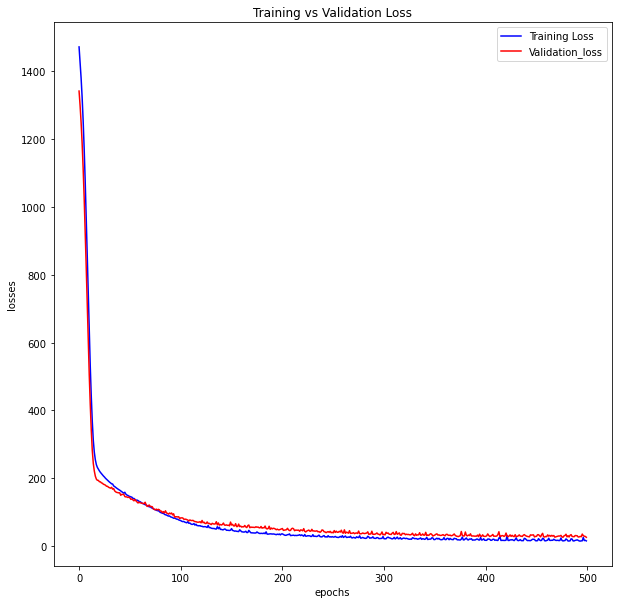

In [27]:
import matplotlib.pyplot as plt

t_loss = history.history['loss']
v_loss = history.history['val_loss']

epochs = range(500)
fig = plt.figure(figsize=(10,10))
plt.plot(epochs, t_loss, 'b', label='Training Loss')
plt.plot(epochs, v_loss, 'r', label='Validation_loss')
plt.xlabel('epochs')
plt.ylabel('losses')
plt.title("Training vs Validation Loss")
plt.legend()
plt.show()

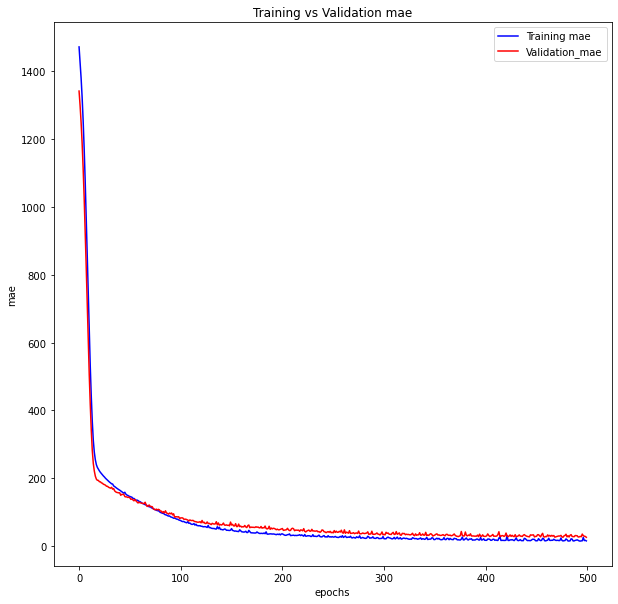

In [28]:
t_mae = history.history['mae']
v_mae = history.history['val_mae']

epochs = range(500)
fig = plt.figure(figsize=(10,10))
plt.plot(epochs, t_loss, 'b', label='Training mae')
plt.plot(epochs, v_loss, 'r', label='Validation_mae')
plt.xlabel('epochs')
plt.ylabel('mae')
plt.title("Training vs Validation mae")
plt.legend()
plt.show()

In [19]:
model.evaluate(test_data, test_labels)

10/10 [==============================] - 0s 655us/step - loss: 26.3308 - mae: 3.7908


[26.330780029296875, 3.7907655239105225]